### 앙상블
* GBM(그래디언트부스트), XGvoost, LightGBM, Adaboost
* baging: parallel(한 번에 병렬적으로 결과 얻음), boosting: sequential(순차 진행)

In [4]:
import pandas as pd

wine_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv"

wine = pd.read_csv(wine_url, index_col=0)

wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

* standartscaler 사용

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [6]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=13)

* 모든 column 히스토그램 조사

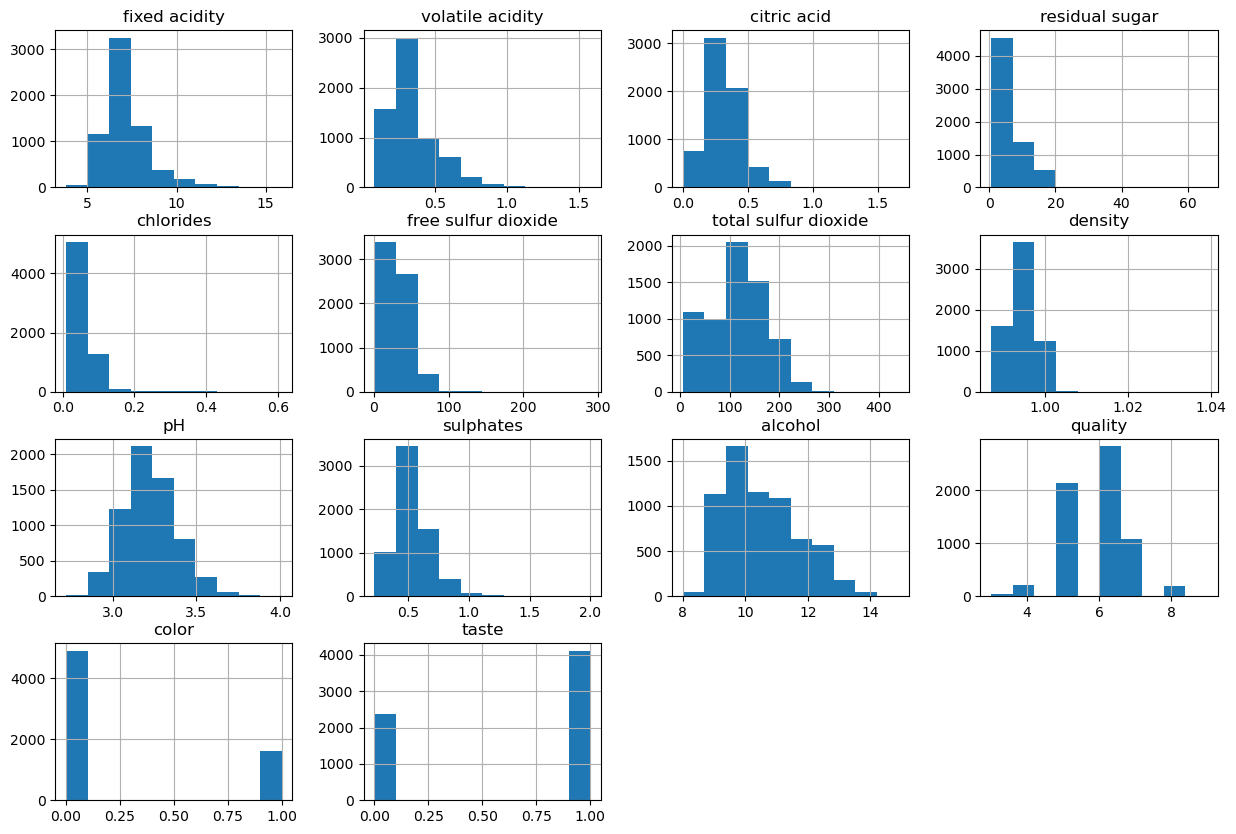

In [7]:
import matplotlib.pyplot as plt

wine.hist(bins=10, figsize=(15, 10));

In [8]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'taste'],
      dtype='object')

In [9]:
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

df_pivot_table = wine.pivot_table(column_names, ['quality'], aggfunc='median')
df_pivot_table

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,10.15,0.0550,0.33,0.995900,7.45,17.0,3.245,3.15,0.505,102.5,0.415
4,10.00,0.0505,0.26,0.994995,7.00,15.0,3.220,2.20,0.485,102.0,0.380
5,9.60,0.0530,0.30,0.996100,7.10,27.0,3.190,3.00,0.500,127.0,0.330
6,10.50,0.0460,0.31,0.994700,6.90,29.0,3.210,3.10,0.510,117.0,0.270
7,11.40,0.0390,0.32,0.992400,6.90,30.0,3.220,2.80,0.520,114.0,0.270
8,12.00,0.0370,0.32,0.991890,6.80,34.0,3.230,4.10,0.480,118.0,0.280
9,12.50,0.0310,0.36,0.990300,7.10,28.0,3.280,2.20,0.460,119.0,0.270


In [12]:
# quality에 대한 나머지 특정들의 상관관계

corr_matrix = wine.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,taste
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740,-0.067354
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036,-0.267046
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397,0.075739
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821,-0.032484
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678,-0.181908
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644,0.044819
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357,-0.047585
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645,-0.268876
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129,0.018842
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218,0.035807


In [13]:
print(corr_matrix['quality'].sort_values(ascending=False))

quality                 1.000000
taste                   0.814484
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
color                  -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


```python
sns.countplot(wine['taste'])
```
--> ValueError: If using all scalar values, you must pass an index

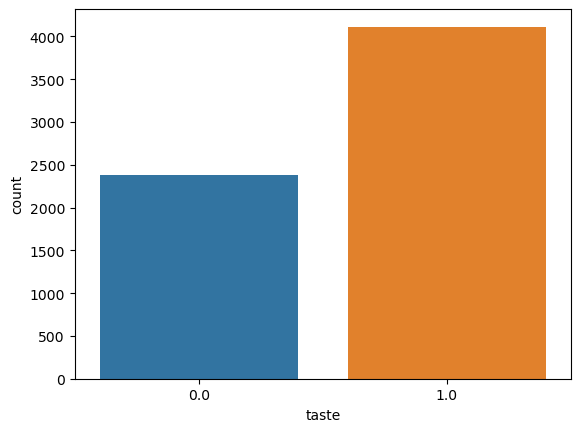

In [28]:
# taste column의 분포
import seaborn as sns

sns.countplot(x='taste', data=wine);

* 다양한 모델을 한 번에 테스트

In [29]:
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [32]:
models = []
models.append(  ('RandomForestClassifier', RandomForestClassifier())  )
models.append(  ('DecisionTreeClassifier', DecisionTreeClassifier())  )
models.append(  ('AdaBoostClassifier', AdaBoostClassifier())  )
models.append(  ('GradientBoostingClassifier', GradientBoostingClassifier())  )
models.append(  ('LogisticRegression', LogisticRegression())  )

* 결과 저장하기 위한 작업

In [42]:
from sklearn.model_selection import KFold, cross_val_score

results = []
names = []

In [34]:
%time
%%time # 셀 전체에 적용

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs


In [43]:
%%time

for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

    print(name, cv_results.mean(), cv_results.std())

RandomForestClassifier 0.8193105426815727 0.023715350841049903
DecisionTreeClassifier 0.7525462723032501 0.012526588571632745
AdaBoostClassifier 0.7533103205745169 0.02644765901536818
GradientBoostingClassifier 0.7663959428444511 0.021596556352125432
LogisticRegression 0.74273191678389 0.015548839626296565
CPU times: user 9.45 s, sys: 176 ms, total: 9.62 s
Wall time: 9.35 s


* cross-validation 결과 일목요연하게 정리

In [44]:
results

[array([0.82307692, 0.85865385, 0.78537055, 0.82001925, 0.80943215]),
 array([0.75384615, 0.76826923, 0.74302214, 0.76323388, 0.73435996]),
 array([0.74903846, 0.80384615, 0.72666025, 0.74687199, 0.74013474]),
 array([0.77019231, 0.80288462, 0.73820982, 0.7680462 , 0.75264678]),
 array([0.73461538, 0.77307692, 0.73435996, 0.74109721, 0.73051011])]

In [45]:
names

['RandomForestClassifier',
 'DecisionTreeClassifier',
 'AdaBoostClassifier',
 'GradientBoostingClassifier',
 'LogisticRegression']

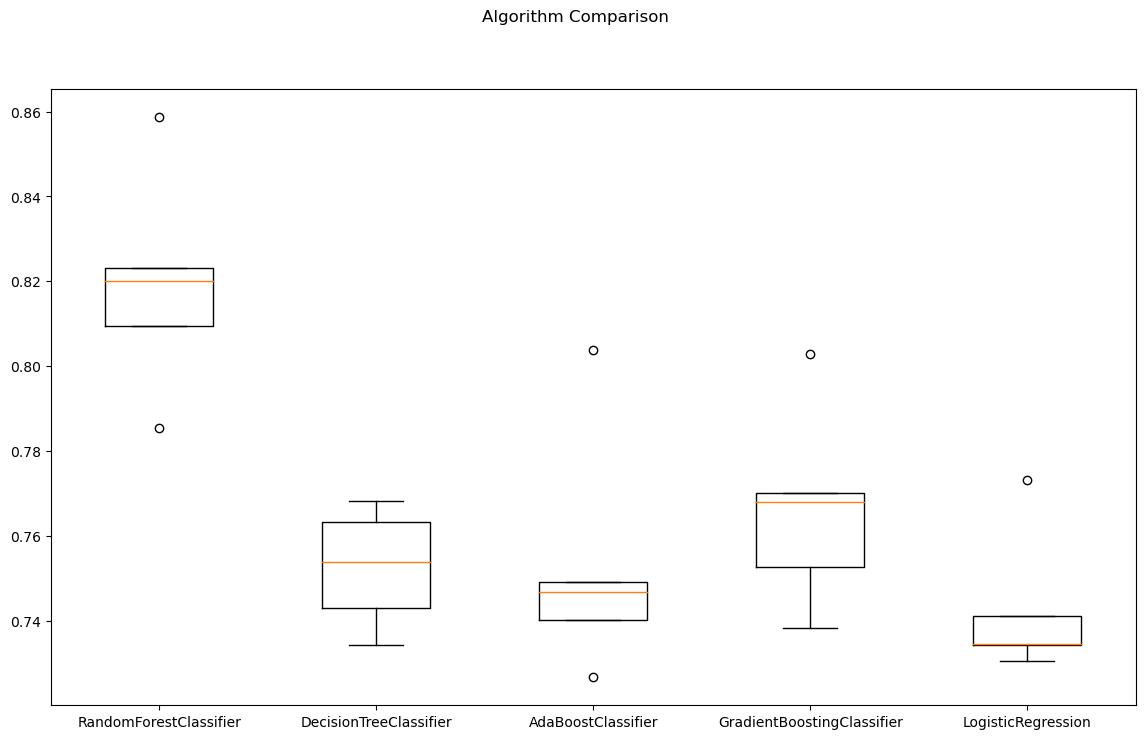

In [46]:
fig = plt.figure(figsize=(14, 8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

--> wine 데이터에서는 random forest가 성능 잘 나옴. 

* 테스트 데이터에 대한 평가 결과

In [47]:
from sklearn.metrics import accuracy_score

for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name, accuracy_score(y_test, pred))

RandomForestClassifier 0.8392307692307692
DecisionTreeClassifier 0.7715384615384615
AdaBoostClassifier 0.7553846153846154
GradientBoostingClassifier 0.7884615384615384
LogisticRegression 0.7469230769230769


--> test 데이터에 대해서도 random forest 가 제일 나음. 